# Regression for all models

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import seaborn as sns

# Load Dataset

In [147]:
house= fetch_california_housing()
df = pd.DataFrame(house.data, columns = house.feature_names)
df['MedHouseVal'] = house.target

<!-- # Converting to Dataframe -->

In [148]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


C:\Users\devan\AppData\Local\Temp\ipykernel_33516\3906199048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MedHouseVal)


<Axes: xlabel='MedHouseVal', ylabel='Density'>

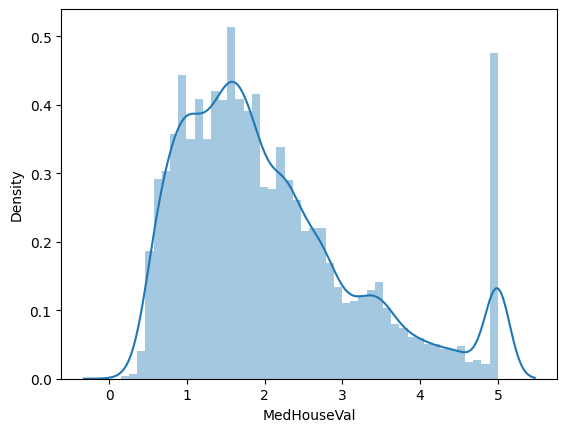

In [149]:
sns.set_style()
sns.distplot(df.MedHouseVal)

In [150]:
X=df.drop('MedHouseVal', axis=1)

In [151]:
y=df['MedHouseVal']

<Axes: >

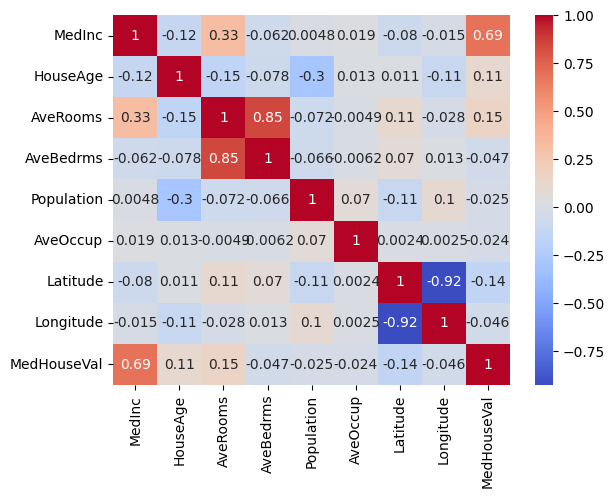

In [152]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

# 1. Linear regression 

In [153]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import StandardScaler

In [154]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20, random_state=42)

In [155]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [157]:
y_pred= lr.predict(X_test)
# print(y_pred)

In [158]:
r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [159]:
print( "R2- Score: ", r2)
print( "MSE: ", mse)
print( "MAE:  ", mae)

R2- Score:  0.5757877060324508
MSE:  0.5558915986952444
MAE:   0.5332001304956564


In [160]:
CV = cross_val_score(lr,X_train, y_train, cv=5, scoring='r2' )

In [161]:
print("Cross validation of r2 score: ", CV)
print("mean of validation score is:", np.mean(CV))

Cross validation of r2 score:  [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
mean of validation score is: 0.6114839952560993


# 2. KNN 

In [162]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
knn = KNeighborsRegressor()
# knn.fit(X_train, y_train)

In [164]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [165]:
GS = GridSearchCV(knn, params, cv = 5, scoring='r2', n_jobs=-1)
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [166]:
best_knn = GS.best_estimator_

print("Best parameters found: ", GS.best_params_)
print("Best cross-validated R2 score: ", GS.best_score_)


Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validated R2 score:  0.7300012758297105


In [167]:
y_pred = best_knn.predict(X_test)

In [168]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [169]:
print("Test set R2 score: ", r2)
print("Test set MSE: ", mse)
print("Test set MAE: ", mae)

Test set R2 score:  0.72210916268423
Test set MSE:  0.3641506481894662
Test set MAE:  0.40580195325466495


# SVR

In [170]:
from sklearn.svm import SVR 

In [171]:
svr = SVR()

In [172]:
params = { 
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'degree': [1,2]
}

In [173]:
GS = GridSearchCV(svr, params , cv = 5, n_jobs = -1, scoring = 'r2')
GS.fit(X_train ,  y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'degree': [1, 2], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='r2')

In [174]:
best_svr = GS.best_estimator_

print("Best parameters found: ", GS.best_params_)
print("Best cross-validated R2 score: ", GS.best_score_)


Best parameters found:  {'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validated R2 score:  0.7368262266634539


In [175]:
y_pred = best_svr.predict(X_test)

In [176]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [177]:
print("Test set R2 score: ", r2)
print("Test set MSE: ", mse)
print("Test set MAE: ", mae)

Test set R2 score:  0.7275628923016773
Test set MSE:  0.35700403193386515
Test set MAE:  0.39859907695205377


# Decision Tree

In [357]:
from sklearn.tree import DecisionTreeRegressor

In [358]:
DT = DecisionTreeRegressor()

In [359]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'splitter' : ["best", "Random"],
    'max_depth' : [1,2,3,4,5],
    'max_features' : [1,2,3,4,5]
}

In [181]:
GS = GridSearchCV(DT , params, scoring = 'r2', n_jobs = -1, cv = 5)
GS.fit(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
375 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'Random']},
             scoring='r2')

In [360]:
best_dt = GS.best_estimator_

print("Best Parameters: ", GS.best_params_)
print("Cross validate R2 score :", GS.best_score_ )

Best Parameters:  {'algorithm': 'elkan', 'init': 'random', 'max_iter': 300, 'n_clusters': 2}
Cross validate R2 score : -0.5807881773399014


In [361]:
y_pred = best_dt.predict(X_test)

In [362]:
r2 = r2_score(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)

In [363]:
print("R2-score: ", r2)
print("mean square error: ", mse)
print("mean absolute error: ", mae)

R2-score:  -1.7142857142857153
mean square error:  1.5833333333333333
mean absolute error:  1.1944444444444444


In [367]:
from sklearn.tree import plot_tree
# plot_tree(best_dt)

# Random Forest

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
rf = RandomForestRegressor()

In [188]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : [1,2,3],
    'max_features' : [1,2,3],
    'n_estimators': [10, 20,30]
    
}

In [189]:
GS = GridSearchCV(rf, params, cv = 5, n_jobs = -1, scoring = 'r2')
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3], 'max_features': [1, 2, 3],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [190]:
best_rf = GS.best_estimator_

print("Best parameters:",GS.best_params_)
print("Cross validate R2: ", GS.best_score_)

Best parameters: {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 3, 'n_estimators': 30}
Cross validate R2:  0.5353511136142746


In [191]:
y_pred = best_rf.predict(X_test)

In [192]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [193]:
print("r2: ",r2)
print("MSE: ", mse)
print("MAE: ", mae)

r2:  0.5238532135261333
MSE:  0.6239470239559075
MAE:  0.5996189729228047



# Classifier for all model

# load dataset

In [194]:
from sklearn.datasets import load_breast_cancer

In [195]:
bc = load_breast_cancer()
df = pd.DataFrame(bc.data,columns = bc.feature_names)
df['target'] = bc.target

In [196]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

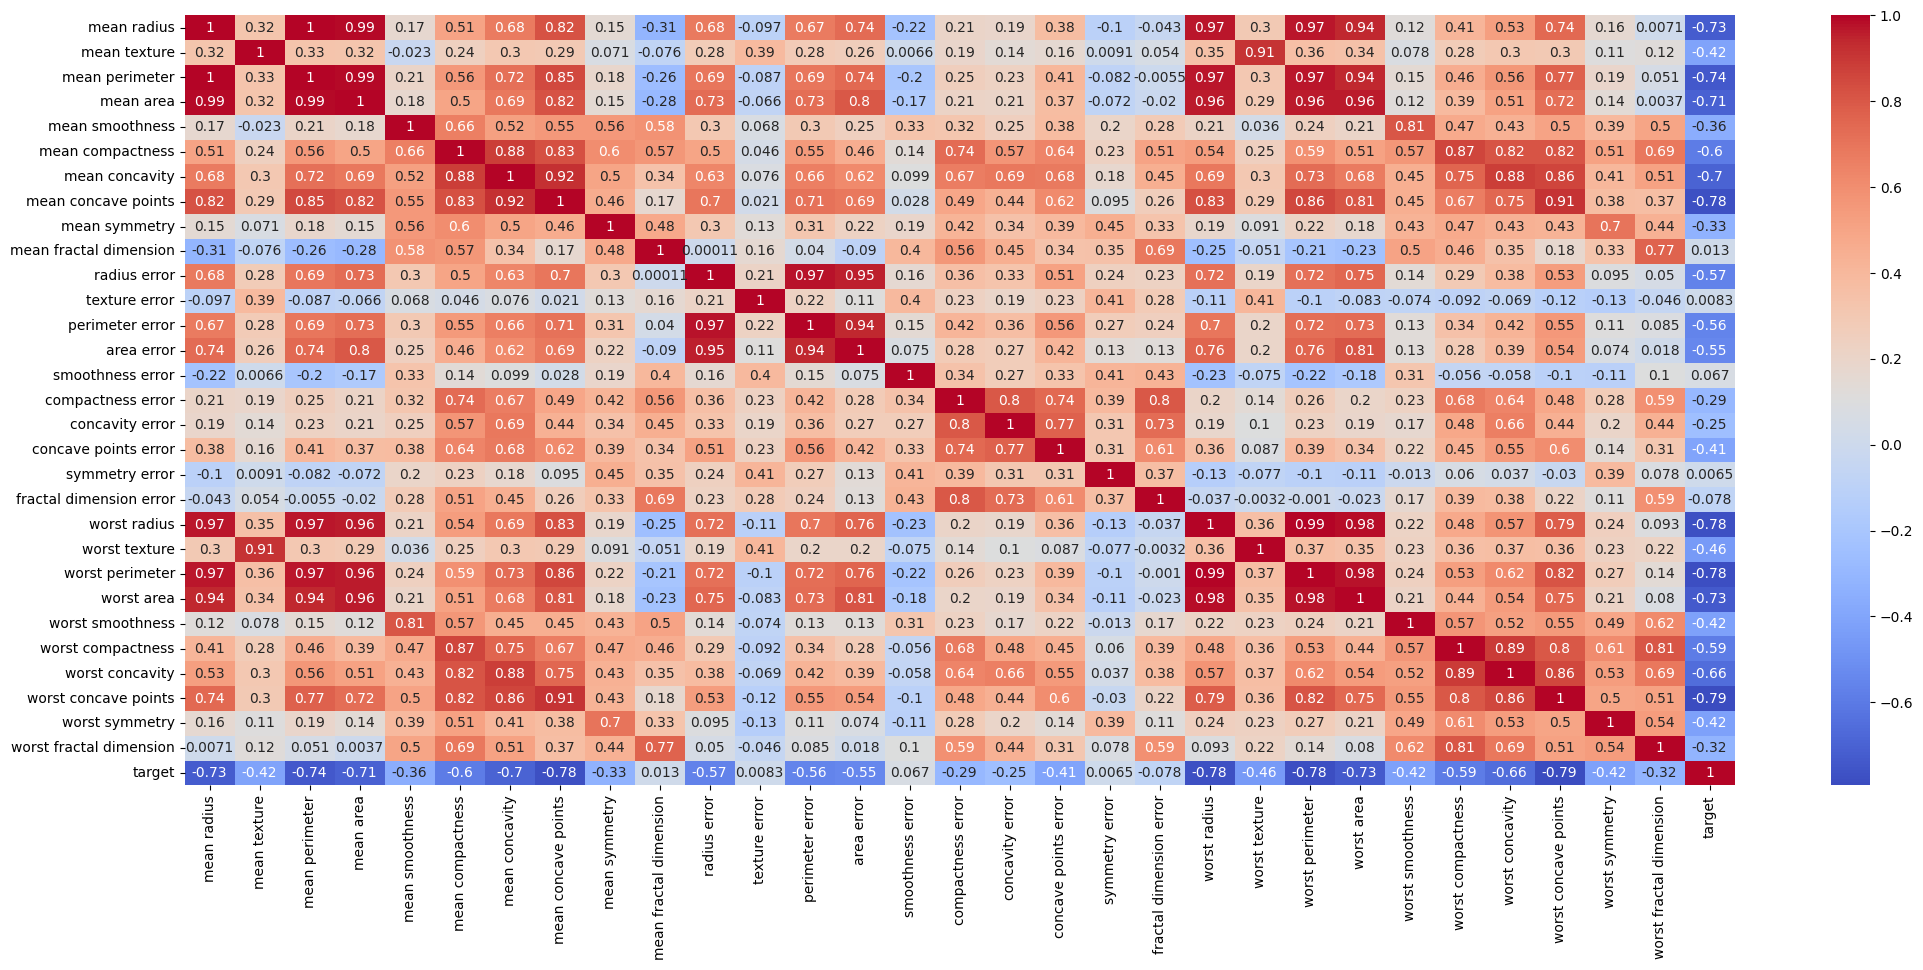

In [197]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, )

# feature selection

In [198]:
X = df.drop('target', axis = 1)
y = df['target']

# Filter Method: SelectKBest with ANOVA F-test score

In [199]:
from sklearn.feature_selection import SelectKBest, f_classif


In [200]:
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X,y)

In [201]:
sel_fea = X.columns[selector.get_support()]
print(sel_fea)

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


# Wrapper Method: Recursive Feature Elimination (RFE)

In [202]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [203]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [204]:
rfe = RFE(rf, n_features_to_select= 10)

In [205]:
X_rfe = rfe.fit_transform(X,y)

In [206]:
sel_fea = X.columns[rfe.support_]
print(sel_fea)

Index(['mean perimeter', 'mean area', 'mean concavity', 'mean concave points',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [207]:
X_new = df[['mean perimeter', 'mean area', 'mean concavity', 'mean concave points',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points']]
 

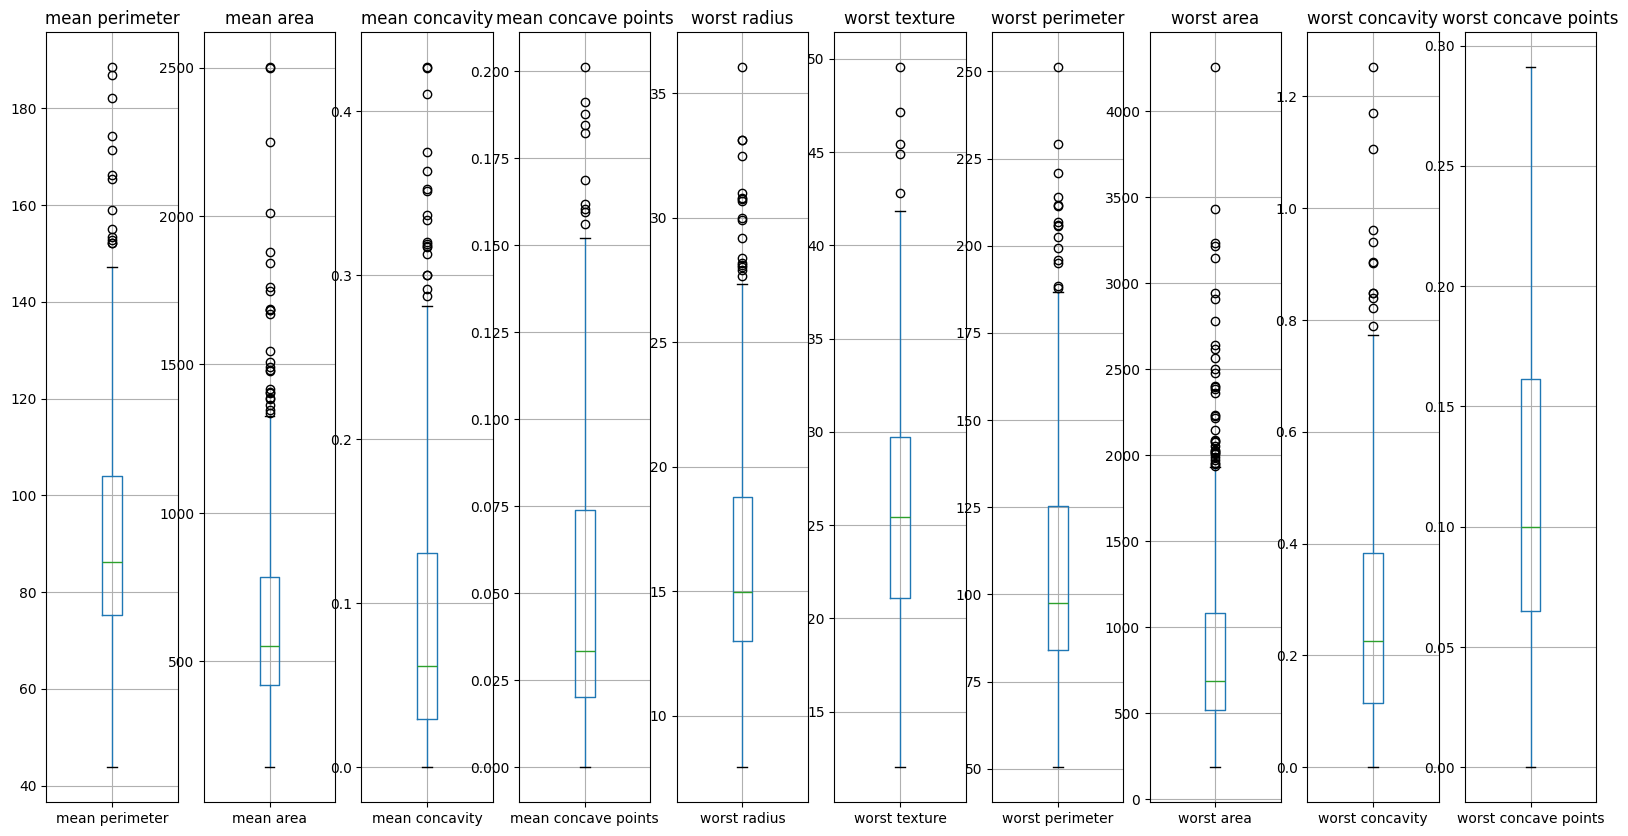

In [208]:
def plots(df):
    fig , axes = plt.subplots(1, len(df.columns), figsize = (20,10))

    for i, column_name in  enumerate(df.columns):
        df.boxplot(column = column_name, ax = axes[i])
        axes[i].set_title(column_name)

    plt.show()
    
plots(X_new)

In [209]:

def rem_out(df):
    data = df.copy()

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR

        data[col] = data[col].apply(lambda x: lb if x < lb else ub if x > ub else x)

    return data

df_cleaned = rem_out(X_new)

        

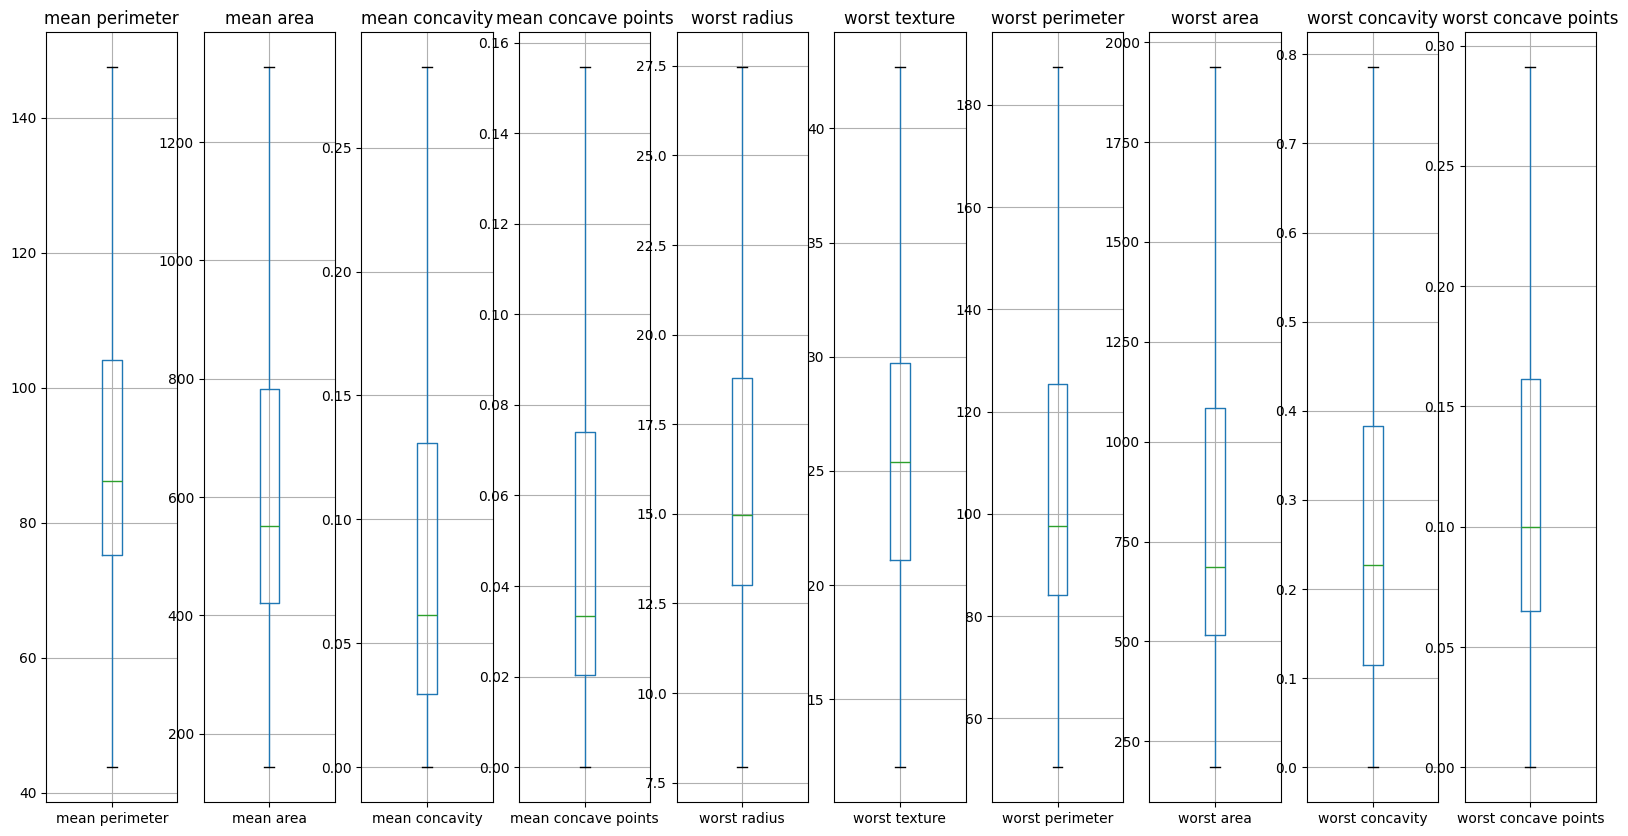

In [210]:
plots(df_cleaned)

In [211]:
X = df_cleaned
X

,mean perimeter,mean area,mean concavity,mean concave points,worst radius,worst texture,worst perimeter,worst area,worst concavity,worst concave points
0,122.80,1001.0,0.28241,0.14710,25.380,17.33,184.60,1937.05,0.7119,0.2654
1,132.90,1326.0,0.08690,0.07017,24.990,23.41,158.80,1937.05,0.2416,0.1860
2,130.00,1203.0,0.19740,0.12790,23.570,25.53,152.50,1709.00,0.4504,0.2430
3,77.58,386.1,0.24140,0.10520,14.910,26.50,98.87,567.70,0.6869,0.2575
4,135.10,1297.0,0.19800,0.10430,22.540,16.67,152.20,1575.00,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,142.00,1326.3,0.24390,0.13890,25.450,26.40,166.10,1937.05,0.4107,0.2216
565,131.20,1261.0,0.14400,0.09791,23.690,38.25,155.00,1731.00,0.3215,0.1628
566,108.30,858.1,0.09251,0.05302,18.980,34.12,126.70,1124.00,0.3403,0.1418
567,140.10,1265.0,0.28241,0.15200,25.740,39.42,184.60,1821.00,0.7855,0.2650


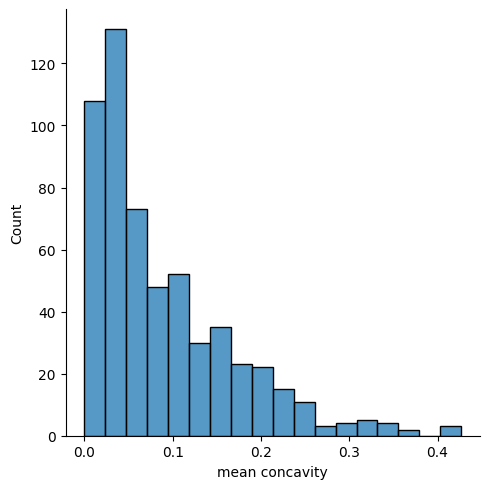

In [212]:
sns.set_style()
sns.displot(df['mean concavity'])

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [214]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [216]:
lor = LogisticRegression()

In [217]:
params = {
    'penalty' : ['l1', 'l2'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg'],
    'max_iter': [50,100,150]
}

In [218]:
GS = GridSearchCV(lor, params, n_jobs = -1, cv =5, scoring='accuracy')
GS.fit(X_train, y_train)

C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dua

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [50, 100, 150], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [219]:
best_lor = GS.best_estimator_

print("Best Parameters: ", GS.best_params_)
print("Best Accuracy Score: ", GS.best_score_)

Best Parameters:  {'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy Score:  0.9758241758241759


In [220]:
y_pred = best_lor.predict(X_test)

In [221]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [222]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


In [223]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  2],
       [ 1, 70]], dtype=int64)

<Axes: >

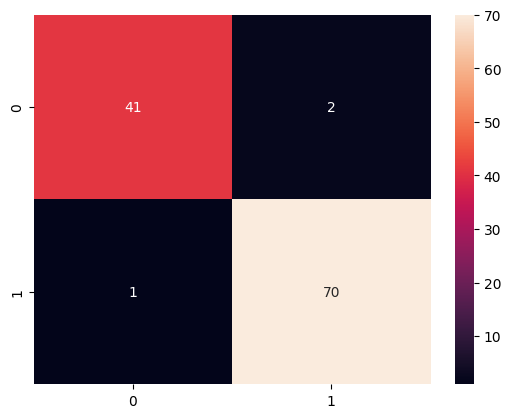

In [224]:
sns.heatmap(cm, annot = True)

In [225]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# KNNC

In [226]:
from sklearn.neighbors import KNeighborsClassifier 

In [227]:
knnc = KNeighborsClassifier()

In [228]:
params = {
    'n_neighbors': [1,2,3,4,5],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

In [229]:
GS = GridSearchCV(knnc , params , n_jobs=-1, scoring='accuracy', cv = 5)
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [230]:
best_knnc = GS.best_estimator_

print("Best parameters: ", GS.best_params_)
print("Best Score: ", GS.best_score_)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
Best Score:  0.9582417582417582


In [231]:
y_pred = best_knnc.predict(X_test)

In [232]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))



Accuracy:  0.956140350877193
recall:  0.971830985915493
precision:  0.9583333333333334
F1-score:  0.965034965034965


In [233]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [234]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  3],
       [ 2, 69]], dtype=int64)

<Axes: >

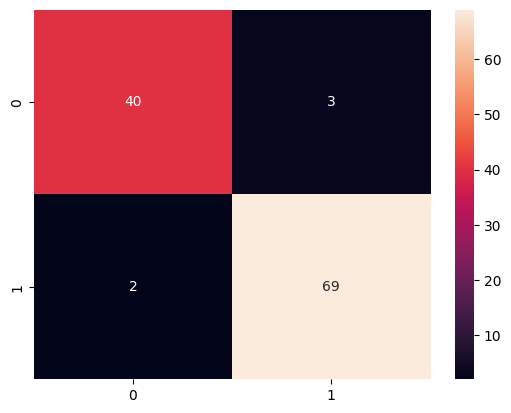

In [235]:
sns.heatmap(cm, annot = True)

# SVC

In [236]:
from sklearn.svm import SVC

In [237]:
svc = SVC()

In [238]:
params = {
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma' : ['scale', 'auto'],
    'degree':[1,2,3,4]
}

In [239]:
GS = GridSearchCV(svc, params, n_jobs=-1, scoring='accuracy', cv = 5)
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [240]:
best_svc = GS.best_estimator_

print("Best parameters: ", GS.best_params_)
print("Best Score: ", GS.best_score_)

Best parameters:  {'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}
Best Score:  0.9758241758241757


In [241]:
y_pred = best_svc.predict(X_test)

In [242]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))



Accuracy:  0.9736842105263158
recall:  0.9859154929577465
precision:  0.9722222222222222
F1-score:  0.9790209790209791


In [243]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [244]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[41,  2],
       [ 1, 70]], dtype=int64)

<Axes: >

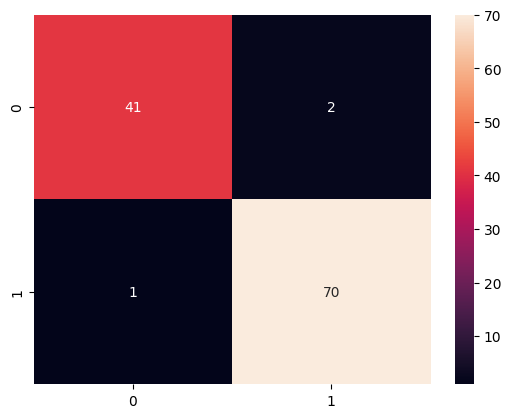

In [245]:
sns.heatmap(cm, annot = True)

# DTC

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [247]:
dtc = DecisionTreeClassifier()

In [248]:
params = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'max_depth': [1,2,3,4,5],
}

In [249]:
GS = GridSearchCV(dtc, params, n_jobs=-1, scoring='accuracy', cv =5)
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [250]:
best_dtc = GS.best_estimator_

print("Best parameters: ", GS.best_params_)
print("Best Score: ", GS.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
Best Score:  0.9494505494505494


In [251]:
y_pred = best_dtc.predict(X_test)

In [252]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))


Accuracy:  0.956140350877193
recall:  0.9859154929577465
precision:  0.9459459459459459
F1-score:  0.9655172413793104


In [253]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [254]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  4],
       [ 1, 70]], dtype=int64)

<Axes: >

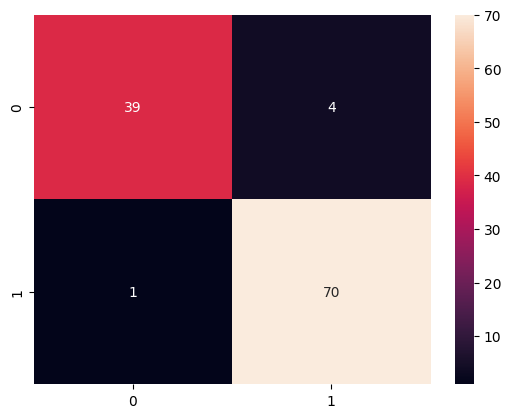

In [255]:
sns.heatmap(cm, annot = True)

# RFC

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [257]:
rfc = RandomForestClassifier()

In [258]:
params = {
    'criterion' : ["gini", "entropy", "log_loss"],
    'max_depth': [1,2,3,4,5],
}

In [259]:
GS = GridSearchCV(rfc, params, n_jobs=-1, scoring='accuracy', cv =5)
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [260]:
best_rfc = GS.best_estimator_

print("Best parameters: ", GS.best_params_)
print("Best Score: ", GS.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5}
Best Score:  0.9670329670329672


In [261]:
y_pred = best_rfc.predict(X_test)

In [262]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))


Accuracy:  0.9649122807017544
recall:  0.9859154929577465
precision:  0.958904109589041
F1-score:  0.9722222222222222


In [263]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [264]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  3],
       [ 1, 70]], dtype=int64)

<Axes: >

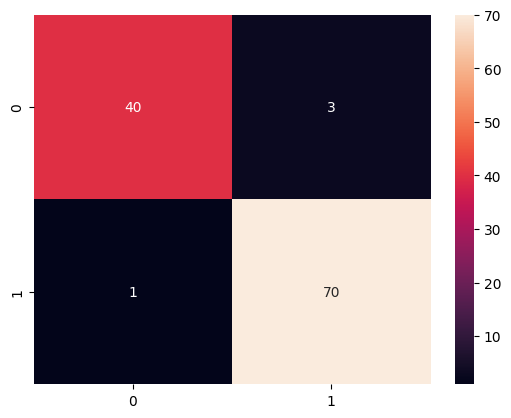

In [265]:
sns.heatmap(cm, annot = True)

# Clustering

In [266]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [267]:
# wine = load_wine()

In [268]:
wine = load_wine()
X = wine.data
y = wine.target


C:\Users\devan\AppData\Local\Temp\ipykernel_33516\3478241603.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')  # Adjust cmap as desired for color map
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


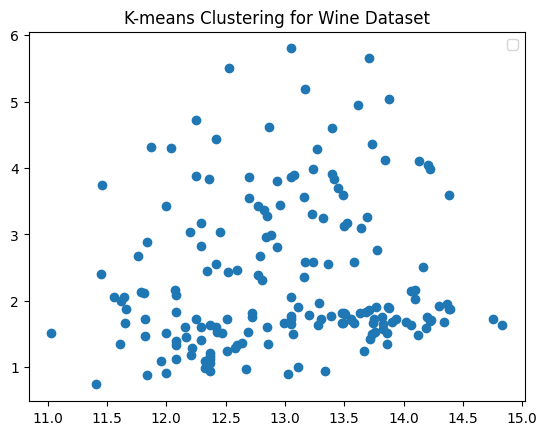

In [269]:
# Assuming 'X' is your data and 'labels' are the cluster labels assigned by K-means
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')  # Adjust cmap as desired for color map
# plt.scatter(clust_centers[:, 0], clust_centers[:, 1], marker='o', s=200, color='red', label='Centroids')
plt.title('K-means Clustering for Wine Dataset')
plt.legend()
plt.show()


In [270]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [271]:
from sklearn.cluster import KMeans

In [272]:
kmeans = KMeans()

In [273]:
params = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 200, 300],
    'algorithm': ['auto', 'full', 'elkan']
}

In [274]:
GS = GridSearchCV(kmeans, params, n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')
GS.fit(X_train, y_train)


C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
74 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Python311\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_

GridSearchCV(cv=5, estimator=KMeans(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300],
                         'n_clusters': [2, 3, 4, 5]},
             scoring='neg_mean_absolute_error')

In [275]:
best_kmeans = GS.best_estimator_

In [276]:
print("Best Parameters:", GS.best_params_)
print("Best Negative MAE Score:", GS.best_score_)


Best Parameters: {'algorithm': 'elkan', 'init': 'random', 'max_iter': 300, 'n_clusters': 2}
Best Negative MAE Score: -0.5807881773399014


In [277]:
labels = best_kmeans.predict(X_test)


In [278]:
clust_centers = best_kmeans.cluster_centers_


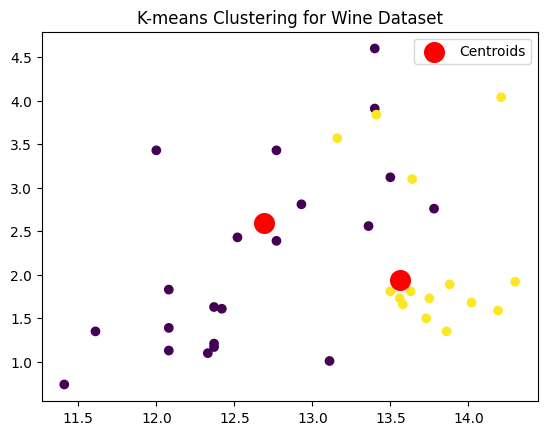

In [279]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap='viridis')  # Adjust cmap as desired for color map
plt.scatter(clust_centers[:, 0], clust_centers[:, 1], marker='o', s=200, color='red', label='Centroids')
plt.title('K-means Clustering for Wine Dataset')
plt.legend()
plt.show()

# another

In [280]:
from sklearn.datasets import load_iris

In [281]:
iris = load_iris()
X = iris.data
y=iris.target

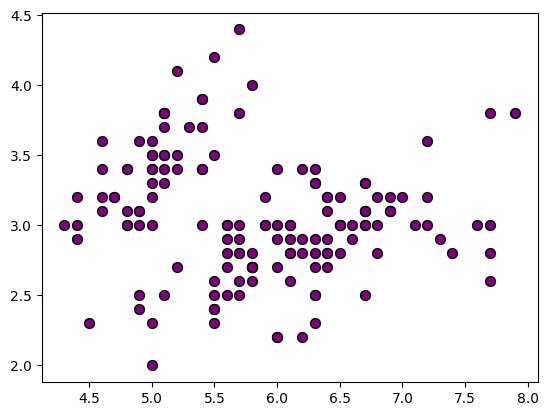

In [282]:
plt.scatter(X[:,0], X[:,1],c='purple',marker='o',edgecolor='k',s=50,label='Oroginal Data')

In [283]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [284]:
# kmeans = KMeans()
model = KMeans(n_clusters=2, init='k-means++',max_iter=300,random_state=42)
model.fit(X)

KMeans(n_clusters=2, random_state=42)

In [285]:
clust_center = model.cluster_centers_

plot the centers

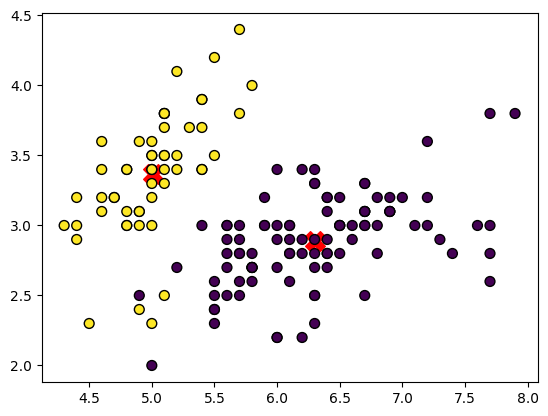

In [286]:
plt.scatter(clust_center[:,0], clust_center[:,1],c='red',marker='X',s=200,label='Centroids')
plt.scatter(X[:,0], X[:,1],c=model.labels_,marker='o',edgecolor='k',s=50,label='clusters',cmap='viridis')


In [287]:
from sklearn.metrics import silhouette_score

In [288]:
y_pred = model.predict(X)

In [289]:
silhouette = silhouette_score(X, model.labels_)
silhouette

0.6810461692117462

# Fuzzy - c means

In [299]:
from fcmeans import FCM

In [300]:
iris = load_iris()

In [301]:
X=iris.data
y=iris.target


In [302]:
fcm = FCM(n_clusters=3, m=2, max_iter=150, error=1e-5, random_state=42)
fcm.fit(X)

In [303]:
centers = fcm.centers
labels = fcm.predict(X)
membership = fcm.u

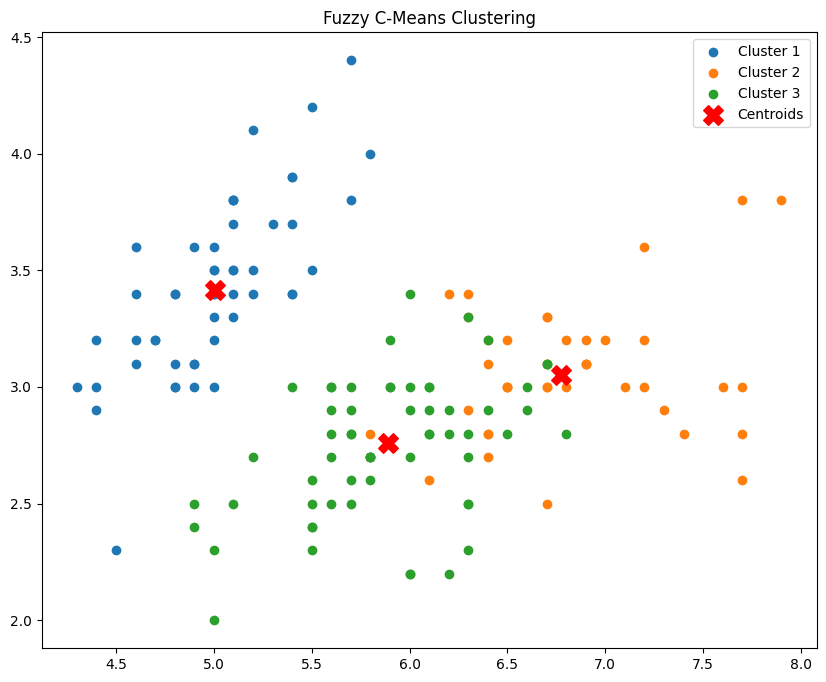

In [305]:
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centers[:, 0],centers[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.show()

In [306]:
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.549517512647162


# K-means from scratch

# step-1 Initialize centroids

In [307]:
def inti_centroids(X, k):
    # ensure reproducibility by random seed
    np.random.seed(42)

    #randomly suffle indices of datasets
    random_indices = np.random.permutation(len(X))

    # select 1st k points as initial centroids
    centroids = X[random_indices[:k]]

    return centroids 
    

# step-2 Compute distance

In [345]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
    
def compute_dist(X,cetroids):
    #matrix to store distances from each point to the centroids
    dist = np.zeros((X.shape[0], len(centroids)))

    # compute euclidean distance
    for i, centroid in enumerate(centroids):
        dist[:,i] = euclidean_distance(X,centroid)
    return dist
    

# step-3 Assign clusters

In [323]:
def assign_clust(dist):
    return np.argmin(dist, axis = 1)

# step-4 Update Cetroids

In [331]:
def update_cent(X, labels, k):
    # matrix to store updated centroids 
    centroids = np.zeros((k, X.shape[1]))

    #compute mean of all centroids 
    for i in range(k):
        centroids[i] = X[labels == i].mean(axis=0)

    return centroids


# step-5 check convergence

In [333]:
def converge(old_cent, new_cent, tol=1e-4):
    dist = euclidean_distance(new_cent, old_cent)

    return np.all(dist < tol)

# step-6 K-means algo

In [341]:
def k_means(X,k,max_iter = 100):
    centroids= inti_centroids(X,k)

    for i in range(max_iter):
        dist = compute_dist(X, centroids)
        labels = assign_clust(dist)
        new_cent = update_cent(X,labels,k)

        if converge(centroids, new_cent):
            break
        centroids = new_cent
    return centroids, labels

In [335]:
from sklearn.datasets import make_blobs

In [336]:
X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.6,random_state=0)

In [337]:
k=4

In [346]:
cent,label=k_means(X,k=4)
print("Final Centroids:", cent)
print("Final labels:", label)

Final Centroids: [[-0.00632763  3.96782089]
 [        nan         nan]
 [        nan         nan]
 [        nan         nan]]
Final labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


C:\Users\devan\AppData\Local\Temp\ipykernel_33516\158224638.py:7: RuntimeWarning: Mean of empty slice.
  centroids[i] = X[labels == i].mean(axis=0)
C:\Python311\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [349]:
import numpy as np

def inti_centroids(X, k):
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

def compute_dist(X, centroids):
    dist = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        dist[:, i] = np.sqrt(np.sum((X - centroid) ** 2, axis=1))
    return dist

def assign_clust(dist):
    return np.argmin(dist, axis=1)

def update_cent(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        if points.size > 0:
            centroids[i] = np.mean(points, axis=0)
        else:
            # If a cluster has no points, reinitialize its centroid randomly
            centroids[i] = X[np.random.randint(0, X.shape[0])]
    return centroids

def k_means(X, k, max_iter=100):
    centroids = inti_centroids(X, k)
    for i in range(max_iter):
        dist = compute_dist(X, centroids)
        labels = assign_clust(dist)
        new_centroids = update_cent(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Example usage
X = np.random.rand(100, 2)  # Example dataset
cent, label = k_means(X, k=4)
print("Final Centroids:", cent)
print("Final labels:", label)


Final Centroids: [[0.22649613 0.73660126]
 [0.75753735 0.20987649]
 [0.24387656 0.26537525]
 [0.746258   0.65331527]]
Final labels: [2 2 0 2 0 0 1 3 2 3 1 1 3 2 2 0 3 3 3 2 2 2 3 2 0 0 0 1 3 2 3 3 3 3 1 3 0
 0 3 0 1 0 2 1 3 1 1 1 3 3 0 2 0 1 1 2 2 3 2 0 0 3 1 3 1 2 3 1 1 2 1 3 0 2
 2 3 3 3 1 0 1 2 1 2 0 0 0 2 3 3 1 3 3 3 0 0 1 3 3 0]


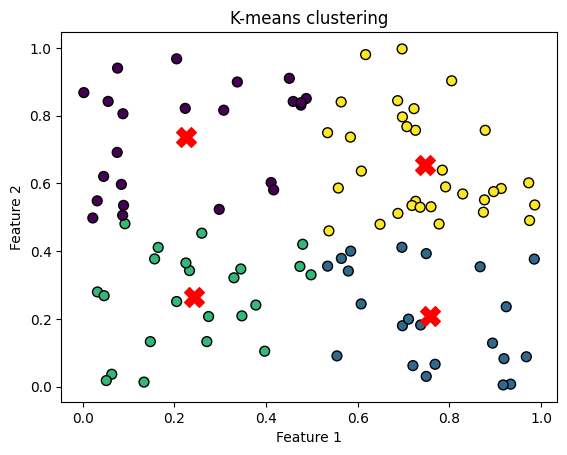

In [351]:
def plot_clust(X,cent,label):
    plt.scatter(X[:,0], X[:,1], c=label, cmap='viridis', marker='o', edgecolors='k', s=50)
    plt.scatter(cent[:,0], cent[:,1], c='red',marker='X', s=200)

    plt.title('K-means clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_clust(X,cent,label)
    

In [353]:
print(silhouette_score(X,label))

0.3721377878781967


# data preprocessing